In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, how = "left", on = ["city", "city"])

In [2]:
# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

Text(42,35,'Note:\nCircle size correlates with driver count per city.')

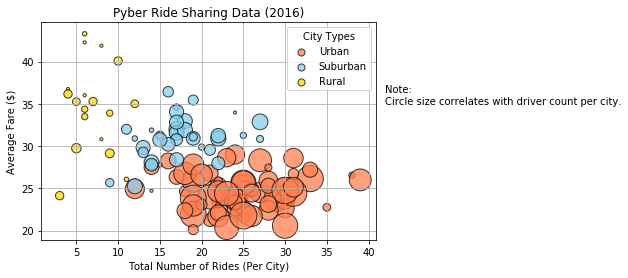

In [3]:
# Obtain the x and y coordinates for each of the three city types
# Create a filtered data frame for each city type
urban_data = pyber_data[pyber_data["type"] == "Urban"]
suburban_data = pyber_data[pyber_data["type"] == "Suburban"]
rural_data = pyber_data[pyber_data["type"] == "Rural"]

# Create variables to hold the urban city type data
urban_ride_total = urban_data.groupby(["city"]).count()["ride_id"]
urban_average_fare = urban_data.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_data.groupby(["city"]).mean()["driver_count"]

# Create variables to hold the suburban city type data
suburban_ride_total = suburban_data.groupby(["city"]).count()["ride_id"]
suburban_average_fare = suburban_data.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_data.groupby(["city"]).mean()["driver_count"]

# Create variables to hold the rural city type data
rural_ride_total = rural_data.groupby(["city"]).count()["ride_id"]
rural_average_fare = rural_data.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_data.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_ride_total, urban_average_fare, s = urban_driver_count * 10, facecolors = "coral",
            edgecolors = "black", linewidths = 1, marker = "o", alpha = 0.75, label = "Urban")

plt.scatter(suburban_ride_total, suburban_average_fare, s = suburban_driver_count * 10, facecolors = "skyblue", 
            edgecolors = "black", linewidths = 1, marker = "o", alpha = 0.75, label = "Suburban")

plt.scatter(rural_ride_total, rural_average_fare, s = rural_driver_count * 10, facecolors = "gold", 
            edgecolors = "black", linewidths = 1, marker = "o", alpha = 0.75, label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
legend = plt.legend(loc = "best", title = "City Types")

# Ensure that the circles in the legend are of uniform size
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("pyber_scatter.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

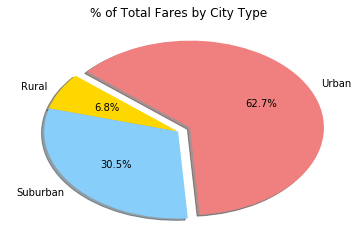

In [5]:
# Calculate Type Percents
type_percents = pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum() * 100

# Build Pie Chart
plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"], colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1], autopct = "%1.1f%%", shadow = True, startangle = 140)

# Incorporate the other graph properties
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("total_fares_pie.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

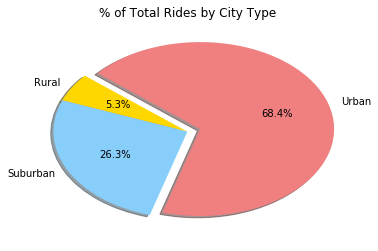

In [7]:
# Calculate Ride Percents
ride_percents = pyber_data.groupby(["type"]).count()["ride_id"] / pyber_data["ride_id"].count() * 100

# Build Pie Chart
plt.pie(ride_percents, labels = ["Rural", "Suburban", "Urban"], colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1], autopct = "%1.1f%%", shadow = True, startangle = 140)

# Incorporate the other graph properties
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("total_rides_pie.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

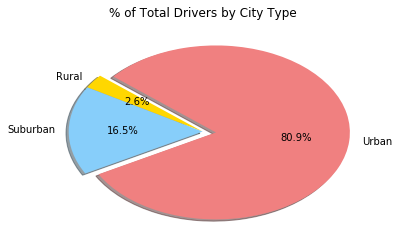

In [9]:
# Calculate Driver Percents
driver_percents = city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum() * 100

# Build Pie Charts
plt.pie(driver_percents, labels = ["Rural", "Suburban", "Urban"], colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1], autopct = "%1.1f%%", shadow = True, startangle = 140)

# Incorporate the other graph properties
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("total_drivers_pie.png")

In [10]:
# Show Figure
plt.show()